# CARTOFrames Testing

Playing around with some of the features of CARTO's CARTOFrames Python library.

In [5]:
import pandas as pd
import cartoframes

## Authenticate

We load `Credentials` and `CartoContext` from `cartoframes`. We pass a username and associated API key to `Credentials()`. Finally, we save the credentials.

In [64]:
from cartoframes import Credentials, CartoContext
creds = Credentials(username = 'USERNAME', key = 'API KEY')
creds.save()

According to the docs, once you've saved your credentials you can use the following instead:

```Python
from cartoframes import CartoContext
cc = CartoContext()
```

## Create a CartoContext

In [6]:
cc = CartoContext()

## View lsit of tables in CARTO account

[How to use SQL to return list of tables from authenticated user's CARTO account](https://gis.stackexchange.com/a/94512)

In [8]:
cc.query('SELECT * FROM CDB_UserTables() ORDER BY cdb_usertables')

,cdb_usertables
0,bg10k_2015_counts
1,city_owned_property
2,customer_report_test
3,customer_report_test_2
4,mlc_201608_2_geocoded
5,mlc_active_membership_201608
6,ne_50m_admin_1_states_provinces_lakes
7,parks
8,parks_new
9,raleigh_greenway_trails


## Add a new dataset to CARTO from PostGIS

In [14]:
# Connect to a PostGIS database using sqlalchemy

from sqlalchemy import create_engine
engine = create_engine('postgresql://maptastik@localhost:5432/cor')

### Write City of Raleigh Parks data from PostGIS

#### Convert Parks PostGIS table to a pandas DataFrame

In [21]:
parks_df = pd.read_sql('parks', con=engine)
parks_df.set_index('id', inplace = True)
parks_df.head()

/home/maptastik/miniconda3/envs/cartoframe/lib/python3.6/site-packages/sqlalchemy/dialects/postgresql/base.py:2543: SAWarning: Did not recognize type 'geometry' of column 'geom'
  (attype, name))


,geom,objectid,name,park_type,file_number,parcel_count,id_number,developed,map_acres,address,zip_code,alternate_address,lwcf,parkid,initial_aquisition_date,shape_length,shape_area
id,,,,,,,,,,,,,,,,,
1,0106000020D80800000100000001030000000100000063...,1,Thornton Road Property,Community,C-17,2,21700,Undeveloped,130.609432,5600 Thornton Rd,27616,6100 Thornton Rd,No,1,1998-10-07,13130.109124,5.689324e+06
2,0106000020D8080000010000000103000000010000002E...,2,Sierra Drive Property,Neighborhood,N-44,1,34400,Undeveloped,2.447495,2640 Sierra Dr,27603,NA,No,2,2009-08-31,1412.464218,1.066124e+05
3,0106000020D80800000200000001030000000100000006...,3,Eliza Pool,Neighborhood,N-31,2,33100,Developed,6.244034,1600 Fayetteville St,27603,NA,No,3,1996-02-29,2738.523454,2.719890e+05
5,0106000020D8080000010000000103000000010000009E...,5,Marsh Creek,Community,C-8,6,20800,Developed,110.606628,3016 New Hope Rd,27604,NA,Yes,5,1973-04-20,14296.136021,4.818005e+06
6,0106000020D80800000100000001030000000100000061...,6,Optimist,Community,C-9,1,20900,Developed,30.721075,5900 Whittier Dr,27609,NA,Yes,6,1969-01-01,7955.386734,1.338205e+06


#### Write `parks_df` to CARTO

In [24]:
cc.write(df = parks_df,
         table_name = 'prcr_parks',
         overwrite = True)

Table successfully written to CARTO: https://maptastik.carto.com/dataset/prcr_parks


### Repeat for asset_inventory...

In [46]:
ai_df = pd.read_sql('asset_inventory', con=engine)
ai_df.set_index('id', inplace = True)
cc.write(df = ai_df,
         table_name = 'prcr_asset_inventory',
         overwrite = True)

/home/maptastik/miniconda3/envs/cartoframe/lib/python3.6/site-packages/sqlalchemy/dialects/postgresql/base.py:2543: SAWarning: Did not recognize type 'geometry' of column 'geom'
  (attype, name))


Table successfully written to CARTO: https://maptastik.carto.com/dataset/prcr_asset_inventory


### ...and again for asset_inventory_codes

In [30]:
aic_df = pd.read_sql('asset_inventory_codes', con=engine)
aic_df.set_index('index', inplace = True)
cc.write(df = aic_df,
         table_name = 'prcr_asset_inventory_codes',
         overwrite = True)

Table successfully written to CARTO: https://maptastik.carto.com/dataset/prcr_asset_inventory_codes


## Make a basic map

In [31]:
from cartoframes import Layer, BaseMap, styling

In [33]:
cc.map(layers = [Layer('prcr_parks')])

## Change the basemap

In [35]:
cc.map(layers = [BaseMap('dark'),
                 Layer('prcr_parks')])

## Make a static map

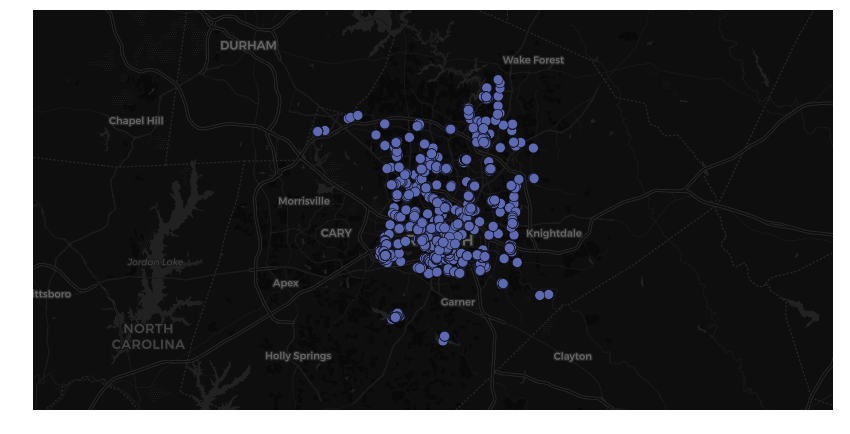

In [49]:
%matplotlib inline

cc.map(layers = [BaseMap('dark'),
                 Layer('prcr_asset_inventory')],
       interactive = False)

## Style some stuff

In [63]:
%matplotlib inline

cc.map(layers = [BaseMap('dark'),
                 Layer('prcr_asset_inventory',
                       size = 6,
                       color = {
                           'column': 'category',
                           'scheme': styling.prism(bins = 10,bin_method='category')
                       })],
       interactive = True)

## Do some SQL stuff to mash up layers

## Plot a layer using geopandas